# Final Third & Defensive Third Pass Analysis - 21/22 Indian Super League
### Visualizing & analyzing how teams passed in the final third as well as how they defended their opponents' passes in their own third

## First, load the packages needed
#### Make sure to install any you don't have installed already
#### We'll also initialize the StatsBomb parser so that we can get the data we want

In [1]:
from mplsoccer import Sbopen, VerticalPitch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

parser = Sbopen(dataframe=True)


#### This line below includes all of the StatsBomb match IDs for the ISL matches in 21/22 

In [2]:
isl_matchids = [3813314, 3813297, 3813298, 3813270, 3813309, 3813289, 3813296, 3813315, 3813291, 3813277, 3813292, 3813294, 3813317, 3813312, 3813288, 3813280, 3813316, 3813274, 3813300, 3813268, 3813267, 3813299, 3813284, 3813301, 3813281, 3813285, 3813310, 3813290, 3813269, 3813286, 3813287, 3813276, 3813279, 3813272, 3813282, 3813307, 3813306, 3813278, 3813304, 3813308, 3813275, 3813318, 3813295, 3813303, 3813283, 3813271, 3813311, 3813273, 3813293, 3813264, 3813302, 3813265, 3813266, 3813305, 3817849, 3817850, 3817851, 3817879, 3817890, 3817865, 3817853, 3817876, 3817874, 3813313, 3817878, 3817867, 3817868, 3817860, 3817875, 3817888, 3817861, 3817871, 3817894, 3817882, 3817864, 3817886, 3817883, 3817852, 3817896, 3817884, 3817895, 3817881, 3817869, 3817873, 3817862, 3817902, 3817848, 3817880, 3817901, 3817877, 3817855, 3817863, 3817900, 3817872, 3817885, 3817897, 3817892, 3817859, 3817858, 3817898, 3817854, 3817893, 3817857, 3817866, 3817889, 3817899, 3817891, 3817887, 3817870, 3817856, 3827337, 3827338, 3827335, 3827336, 3827767]


### Create a blank df with the correct column names by downloading 1 match and setting our data frame's columns to that data frame's columns 

In [3]:
events, related, freeze, tactics = parser.event(isl_matchids[0])
df = pd.DataFrame(columns=events.columns)


#### Now we'll download every single ISL match's events, so that we can do a season analysis. Might take a moment, depending on your computer 

In [4]:
for i in range(len(isl_matchids)):
    events, related, freeze, tactics = parser.event(isl_matchids[i])
    df = df.append(events)
df.head()


,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,pass_no_touch,dribble_no_touch,block_offensive,pass_miscommunication,shot_redirect,injury_stoppage_in_chain,block_save_block,shot_open_goal,player_off_permanent,shot_follows_dribble
0,c647cf36-42b5-46d5-921f-c51ea2deb46d,1,1,00:00:00,0,0,1,0.000000,3813314,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8a11c022-1a0b-4071-97bf-24a8a0a8207b,2,1,00:00:00,0,0,1,0.000000,3813314,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,d0dfe726-a66e-4164-98dc-b5f56d85e8e4,3,1,00:00:00,0,0,1,0.000000,3813314,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,56408cf6-2c77-42ff-8c78-2996113d94c0,4,1,00:00:00,0,0,1,0.000000,3813314,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,446e2aaf-0e09-4dff-8d8f-e50931e9771b,5,1,00:00:01.125000,0,1,2,1.875753,3813314,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Set a focal team for the analysis. You can change this and the rest of the analysis will focus on that team. I'm choosing my personal favorite ISL team, Kerala Blasters 

In [5]:
focal_team = 'Kerala Blasters'

### Now we'll get the unique match IDs for the matches KBFC played in. Then, we'll filter our df to only include those matches

In [6]:
# Filter to just fhow matches with the focal team
df_foc_team = df[df['team_name']==focal_team]

# All match IDs for the focal team's matches
focal_matches = df_foc_team.match_id.unique()

# Filter the main df to only include focal team matches
df = df[df['match_id'].isin(focal_matches)]

df.head()

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,pass_no_touch,dribble_no_touch,block_offensive,pass_miscommunication,shot_redirect,injury_stoppage_in_chain,block_save_block,shot_open_goal,player_off_permanent,shot_follows_dribble
0,c647cf36-42b5-46d5-921f-c51ea2deb46d,1,1,00:00:00,0,0,1,0.000000,3813314,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8a11c022-1a0b-4071-97bf-24a8a0a8207b,2,1,00:00:00,0,0,1,0.000000,3813314,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,d0dfe726-a66e-4164-98dc-b5f56d85e8e4,3,1,00:00:00,0,0,1,0.000000,3813314,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,56408cf6-2c77-42ff-8c78-2996113d94c0,4,1,00:00:00,0,0,1,0.000000,3813314,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,446e2aaf-0e09-4dff-8d8f-e50931e9771b,5,1,00:00:01.125000,0,1,2,1.875753,3813314,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### First let's create two dfs, one for the focal team's passes, and one for their opponent's. Since we're just visualizing passes, we can filter both team name and passes together

In [7]:
team_df = df[(df['team_name']==focal_team) & (df['type_name']=='Pass')]
opp_df = df[(df['team_name']!=focal_team)  & (df['type_name']=='Pass')]

print('%s Passes: %i\nOpponent Passes:%i' %(focal_team, len(team_df,), len(opp_df)))

Kerala Blasters Passes: 9334
Opponent Passes:9575


### Since we want to visualize the passes in the final third for both our focal team and their opponents, let's create a few dataframes

In [8]:
# First let's filter to show passes starting in the final third only
team_df = team_df[team_df['x']>=80]
opp_df = opp_df[opp_df['x']>=80]

# Then, filter to only show passes from the middle. I'll use all passes that are within the width of the box
team_df = team_df[team_df['y'].between(18,62)]
opp_df = opp_df[opp_df['y'].between(18,62)]



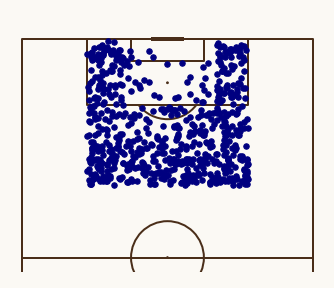

In [9]:
# Now we'll just visualize this quickly to see if it's right
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#fbf9f4', line_color='#4A2E19', line_zorder=1, half=True)
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0, figheight=4,
                      title_height=0.06, title_space=0, axis=False, grid_height=0.86)
fig.set_facecolor('#fbf9f4')

test_team_pass = pitch.scatter(team_df.x, team_df.y,
                          s=30, c='navy', zorder=2, ax=axs['pitch'])

### Let's take out the passes from inside the box now. We have to filter on both x & y, and also reverse that filter. The ~ before the filters tells Python to *exclude* the rows meeting the criteria

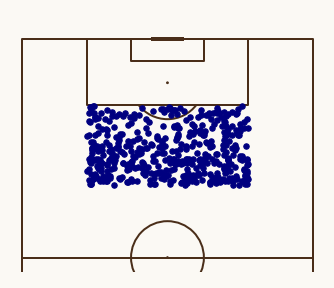

In [10]:
team_df = team_df[~((team_df['x']>=102) & (team_df['y'].between(18,62)))]
opp_df = opp_df[~((opp_df['x']>=102) & (opp_df['y'].between(18,62)))]


# Then double check once more that it worked:
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#fbf9f4', line_color='#4A2E19', line_zorder=1, half=True)
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0, figheight=4,
                      title_height=0.06, title_space=0, axis=False, grid_height=0.86)
fig.set_facecolor('#fbf9f4')

test_team_pass = pitch.scatter(team_df.x, team_df.y,
                          s=30, c='navy', zorder=2, ax=axs['pitch'])


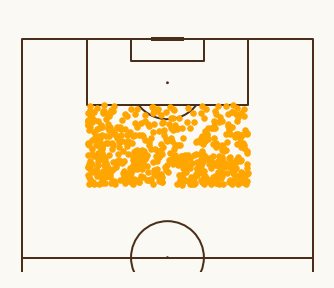

In [11]:
# And quickly check the opponents' df too, which of course should be right as well:
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#fbf9f4', line_color='#4A2E19', line_zorder=1, half=True)
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0, figheight=4,
                      title_height=0.06, title_space=0, axis=False, grid_height=0.86)
fig.set_facecolor('#fbf9f4')

test_team_pass = pitch.scatter(opp_df.x, opp_df.y,
                               s=30, c='orange', zorder=2, ax=axs['pitch'])


### Now for some fun math! We want vertical passes, so we need to use our knowledge of StatsBomb's pass_angle entries and the unit circle/radians

In [12]:
print('Minimum angle:', team_df.pass_angle.min())
print('Maximum angle:', team_df.pass_angle.max())

Minimum angle: -3.1077073
Maximum angle: 3.1415927


#### StatsBomb use negative pi to positive pi for their angles. We would assume that means that 0 (also known as 2 pi on the unit circle) is a perfectly vertical pass, meaning that negative numbers denote passes to the left, or far touch line, and positive angles denote passes to the right, or near side. On the vertical pitches we're using, that just means left and right

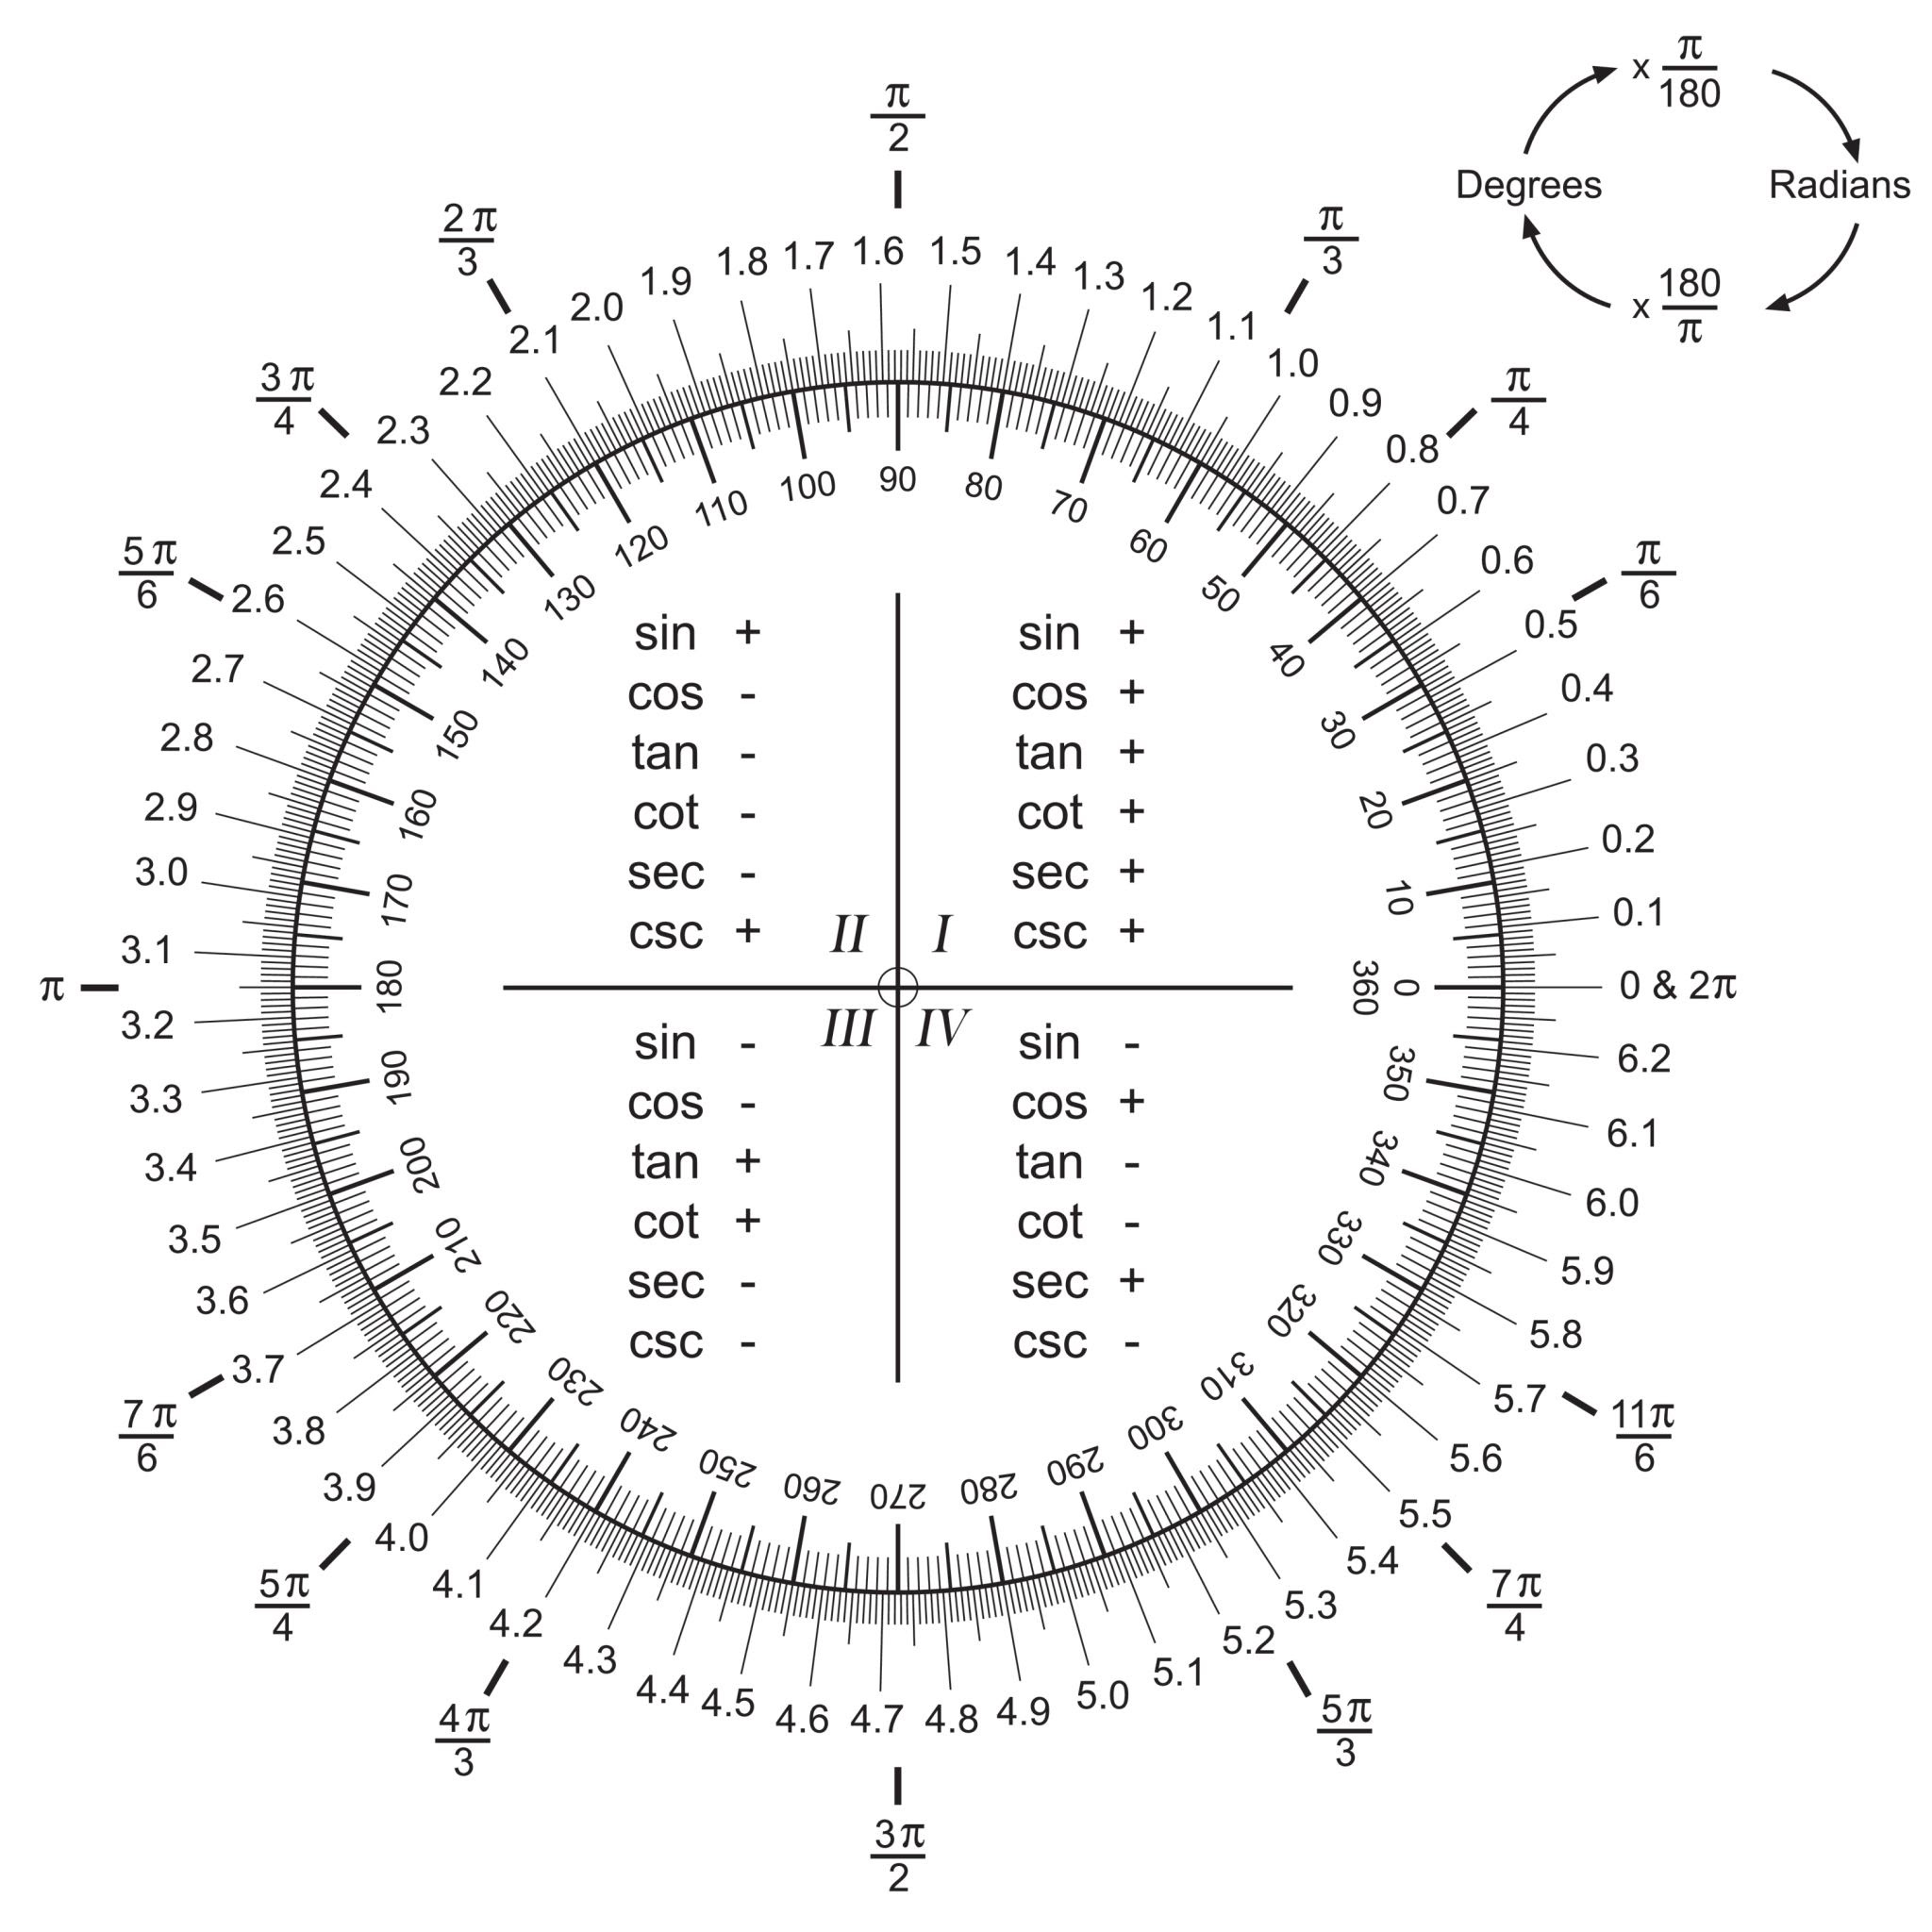

## Now let's run a quick test to make sure that's how Statsbomb have their angles oriented

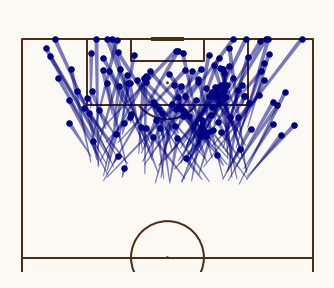

In [13]:
# Set the minimum and maximum radians.
# I use pi/4 as we get about 90 degrees that we can call a "vertical" pass
min_angle = -np.pi/4
max_angle = np.pi/4

# Filter the df to show passes within these angles
test_angles = team_df[team_df['pass_angle'].between(min_angle,max_angle)]

# Test the visual
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#fbf9f4', line_color='#4A2E19', line_zorder=1, half=True)
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0, figheight=4,
                      title_height=0.06, title_space=0, axis=False, grid_height=0.86)
fig.set_facecolor('#fbf9f4')

test_angle_lines = pitch.lines(test_angles.x, test_angles.y,
                               test_angles.end_x, test_angles.end_y,
                               comet=True, alpha=.3, lw=4,
                               color='navy', ax=axs['pitch'])

test_angle_pass = pitch.scatter(test_angles.end_x, test_angles.end_y,
                                s=30, c='navy', zorder=2, ax=axs['pitch'])

### That's perfect. So now let's expand this for all our data frames to make vertical passes that are complete but not shot assists, shot assists, and incomplete. For both the focal team and opponents

In [14]:
#Focal team passes. We're also creating a non-vertical df so that you can visualize those if you would like!
team_vert = team_df[team_df['pass_angle'].between(min_angle,max_angle)]
team_non_vert = team_df[~team_df['pass_angle'].between(min_angle,max_angle)]

opp_vert = opp_df[opp_df['pass_angle'].between(min_angle,max_angle)]
opp_non_vert = opp_df[~opp_df['pass_angle'].between(min_angle,max_angle)]


### VERTICAL
# Vertical complete passes that aren't shot assists
team_vert_cmp = team_vert[(team_vert['outcome_name'].isna()) & (team_vert['pass_assisted_shot_id'].isna())]
opp_vert_cmp = opp_vert[(opp_vert['outcome_name'].isna()) & (opp_vert['pass_assisted_shot_id'].isna())]


# Vertical passes that are shot assists
team_vert_key = team_vert[~team_vert['pass_assisted_shot_id'].isna()]
opp_vert_key = opp_vert[~opp_vert['pass_assisted_shot_id'].isna()]


# Vertical incomplete passes
team_vert_inc = team_vert[~team_vert['outcome_name'].isna()]
opp_vert_inc = opp_vert[~opp_vert['outcome_name'].isna()]


### NON-VERTICAL
# Vertical complete passes that aren't shot assists
team_non_vert_cmp = team_non_vert[(team_non_vert['outcome_name'].isna()) & (team_non_vert['pass_assisted_shot_id'].isna())]
opp_non_vert_cmp = opp_non_vert[(opp_non_vert['outcome_name'].isna()) & (opp_non_vert['pass_assisted_shot_id'].isna())]


# Vertical passes that are shot assists
team_non_vert_key = team_non_vert[~team_non_vert['pass_assisted_shot_id'].isna()]
opp_non_vert_key = opp_non_vert[~opp_non_vert['pass_assisted_shot_id'].isna()]


# Vertical incomplete passes
team_non_vert_inc = team_non_vert[~team_non_vert['outcome_name'].isna()]
opp_non_vert_inc = opp_non_vert[~opp_non_vert['outcome_name'].isna()]


## Now let's make some plots!
#### We have all the data we need, in tidy pre-filtered data frames. So let's visualize everything, starting with the focal team

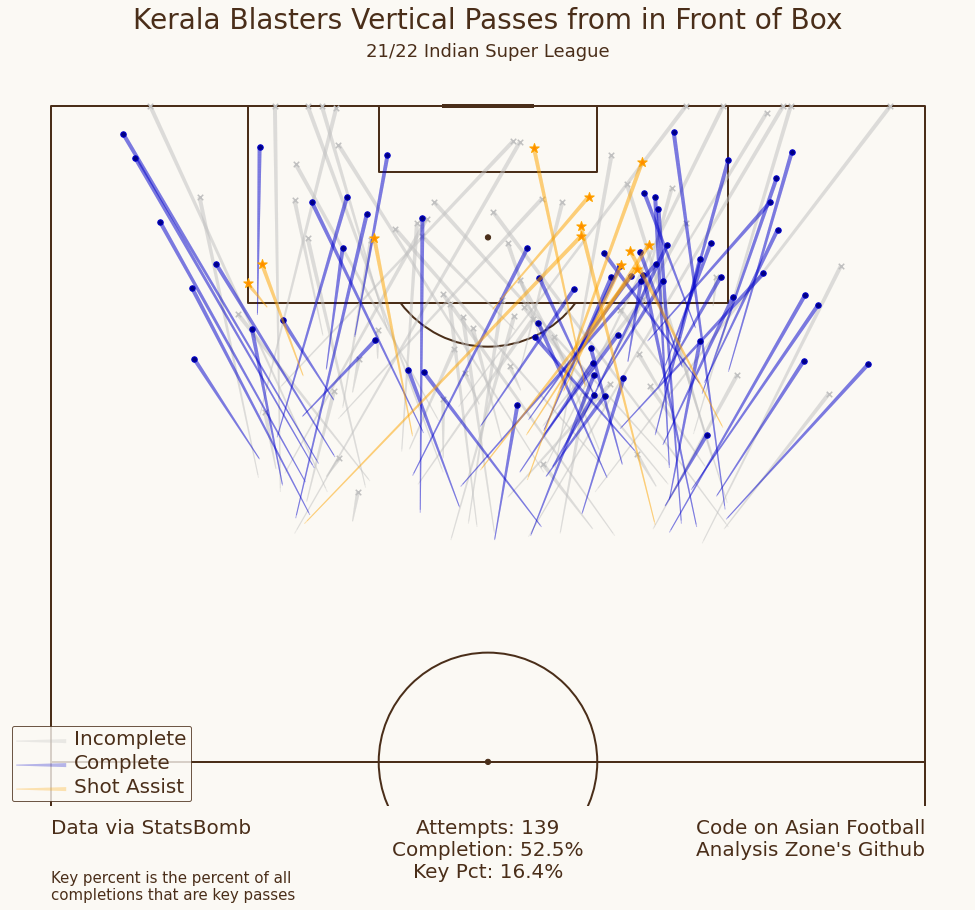

In [15]:
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#fbf9f4', line_color='#4A2E19', line_zorder=1, half=True)
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0, figheight=12,
                      title_height=0.06, title_space=0, axis=False, grid_height=0.86)
fig.set_facecolor('#fbf9f4')


# Incomplete passes -- order matters here, since the graph will plot these first, the others on top.
# We want the incomplete on the bottom, then complete, then shot assists on top
team_vert_inc_pass = pitch.lines(team_vert_inc.x,
                       team_vert_inc.y,
                      team_vert_inc.end_x,
                       team_vert_inc.end_y,
                          comet=True, alpha=.3,
                      lw=4, label='Incomplete',
                      color='silver', ax=axs['pitch'])
team_vert_inc_pass = pitch.scatter(team_vert_inc.end_x, team_vert_inc.end_y,
                          s=30, c='silver', marker='x', zorder=2, ax=axs['pitch'])

# Complete no shot assist
team_vert_cmp_pass = pitch.lines(team_vert_cmp.x,
                       team_vert_cmp.y,
                      team_vert_cmp.end_x,
                       team_vert_cmp.end_y,
                          comet=True, alpha=.3,
                      lw=4, label='Complete',
                      color='mediumblue', ax=axs['pitch'])
team_vert_cmp_pass = pitch.scatter(team_vert_cmp.end_x, team_vert_cmp.end_y,
                          s=30, c='navy', ec='mediumblue', marker='o', zorder=2, ax=axs['pitch'])

# Shot assists
team_vert_key_pass = pitch.lines(team_vert_key.x,
                       team_vert_key.y,
                      team_vert_key.end_x,
                       team_vert_key.end_y,
                          comet=True, alpha=.3,
                      lw=4, label='Shot Assist',
                      color='orange', ax=axs['pitch'])
team_vert_key_pass = pitch.scatter(team_vert_key.end_x, team_vert_key.end_y,
                          s=100, c='darkorange', ec='orange', marker='*', zorder=2, ax=axs['pitch'])


pct = '%' # the way I add variables to strings (%s, %i etc) means I can't use the % characted so need to make it a variable... might be a better way to do this but oh well!
# Add some statistics on the completion % and percent of sompleted passes that assist shots
axs['endnote'].text(0.5, 0.5,
                      'Attempts: %i\nCompletion: %.1f%s\nKey Pct: %.1f%s'
                      %(len(team_vert),
                        (len(team_vert_cmp)+len(team_vert_key))/len(team_vert) * 100,
                        pct,
                        len(team_vert_key)/(len(team_vert_key)+len(team_vert_cmp)) * 100,
                        pct),
                      va='top', ha='center', fontsize=20, color='#4A2E19')

# Add a title
axs['title'].text(0.5, 0.8, "%s Vertical Passes from in Front of Box" %focal_team,
                      color='#4A2E19', va='center', ha='center', fontsize=28)
axs['title'].text(0.5, 0.2, "21/22 Indian Super League",
                      color='#4A2E19', va='center', ha='center', fontsize=18)

# Add the legend and increase text size so it's readable
legend = axs['pitch'].legend(facecolor='#fbf9f4', handlelength=5,
                             edgecolor='#4A2E19', loc='lower left')
for text in legend.get_texts():
    text.set_fontsize(20)
    text.set_color('#4A2E19')

# Add some notes -- if you edit this, make sure you give AFA Zone credit on the image :) 
axs['endnote'].text(1, 0.5, "Code on Asian Football\nAnalysis Zone's Github", va='top', ha='right',
                    fontsize=20, color='#4A2E19')
axs['endnote'].text(0, 0.5, 'Data via StatsBomb', va='top', ha='left',
                    fontsize=20, color='#4A2E19')
axs['endnote'].text(0, -1.5, 'Key percent is the percent of all\ncompletions that are key passes',
                    va='top', ha='left', fontsize=15, color='#4A2E19')

# This will save the image. Comment this out if you don't want to save it
plt.savefig('%s Vertical Passes in Front of Box.png' %focal_team, dpi=250, bbox_inches='tight')

## Opponents' vertical passes in the focal team's defensive third

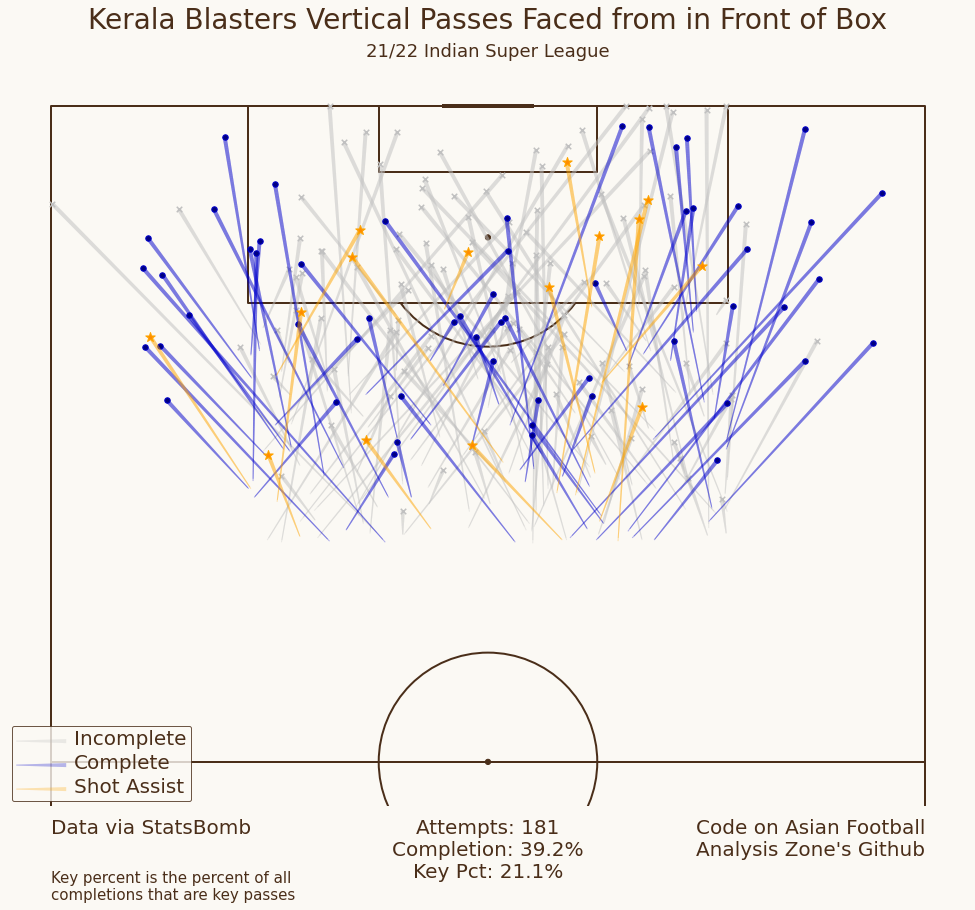

In [16]:
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#fbf9f4', line_color='#4A2E19', line_zorder=1, half=True)
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0, figheight=12,
                      title_height=0.06, title_space=0, axis=False, grid_height=0.86)
fig.set_facecolor('#fbf9f4')


# Incomplete passes -- order matters here, since the graph will plot these first, the others on top.
# We want the incomplete on the bottom, then complete, then shot assists on top
opp_vert_inc_pass = pitch.lines(opp_vert_inc.x,
                       opp_vert_inc.y,
                      opp_vert_inc.end_x,
                       opp_vert_inc.end_y,
                          comet=True, alpha=.3,
                      lw=4, label='Incomplete',
                      color='silver', ax=axs['pitch'])
opp_vert_inc_pass = pitch.scatter(opp_vert_inc.end_x, opp_vert_inc.end_y,
                          s=30, c='silver', marker='x', zorder=2, ax=axs['pitch'])

# Complete no shot assist
opp_vert_cmp_pass = pitch.lines(opp_vert_cmp.x,
                       opp_vert_cmp.y,
                      opp_vert_cmp.end_x,
                       opp_vert_cmp.end_y,
                          comet=True, alpha=.3,
                      lw=4, label='Complete',
                      color='mediumblue', ax=axs['pitch'])
opp_vert_cmp_pass = pitch.scatter(opp_vert_cmp.end_x, opp_vert_cmp.end_y,
                          s=30, c='navy', ec='mediumblue', marker='o', zorder=2, ax=axs['pitch'])

# Shot assists
opp_vert_key_pass = pitch.lines(opp_vert_key.x,
                       opp_vert_key.y,
                      opp_vert_key.end_x,
                       opp_vert_key.end_y,
                          comet=True, alpha=.3,
                      lw=4, label='Shot Assist',
                      color='orange', ax=axs['pitch'])
opp_vert_key_pass = pitch.scatter(opp_vert_key.end_x, opp_vert_key.end_y,
                          s=100, c='darkorange', ec='orange', marker='*', zorder=2, ax=axs['pitch'])


pct = '%' # the way I add variables to strings (%s, %i etc) means I can't use the % characted so need to make it a variable... might be a better way to do this but oh well!
# Add some statistics on the completion % and percent of sompleted passes that assist shots
axs['endnote'].text(0.5, 0.5,
                      'Attempts: %i\nCompletion: %.1f%s\nKey Pct: %.1f%s'
                      %(len(opp_vert),
                        (len(opp_vert_cmp)+len(opp_vert_key))/len(opp_vert) * 100,
                        pct,
                        len(opp_vert_key)/(len(opp_vert_key)+len(opp_vert_cmp)) * 100,
                        pct),
                      va='top', ha='center', fontsize=20, color='#4A2E19')

# Add a title
axs['title'].text(0.5, 0.8, "%s Vertical Passes Faced from in Front of Box" %focal_team,
                      color='#4A2E19', va='center', ha='center', fontsize=28)
axs['title'].text(0.5, 0.2, "21/22 Indian Super League",
                      color='#4A2E19', va='center', ha='center', fontsize=18)

# Add the legend and increase text size so it's readable
legend = axs['pitch'].legend(facecolor='#fbf9f4', handlelength=5,
                             edgecolor='#4A2E19', loc='lower left')
for text in legend.get_texts():
    text.set_fontsize(20)
    text.set_color('#4A2E19')

# Add some notes -- if you edit this, make sure you give AFA Zone credit on the image :) 
axs['endnote'].text(1, 0.5, "Code on Asian Football\nAnalysis Zone's Github", va='top', ha='right',
                    fontsize=20, color='#4A2E19')
axs['endnote'].text(0, 0.5, 'Data via StatsBomb', va='top', ha='left',
                    fontsize=20, color='#4A2E19')
axs['endnote'].text(0, -1.5, 'Key percent is the percent of all\ncompletions that are key passes',
                    va='top', ha='left', fontsize=15, color='#4A2E19')

# This will save the image. Comment this out if you don't want to save it
plt.savefig('%s Vertical Passes Faced in Front of Box.png' %focal_team, dpi=250, bbox_inches='tight')

## And there we have it! The focal team's and their opponents' vertical passes just in front of the box!
#### Once familiar with this code, try making a copy of it and then modifying various elements, especially if you're learning. Try to visualize just back passes, or just laterals, or perhaps passes on the flanks. Maybe you want to restrict the zones not by pass *start* location, but by pass *end* location? If you're learning how to code, try to manipulate this code a little bit -- and be sure to post it on Twitter and tag @AFA_Zone so we can see your great work!!